### Pós-graduação em Ciência de Dados e Machine Learning

#### Módulo 3 - Data Mining e Machine Learning

#### Disciplina: **Introdução a Aprendizagem De Máquina**

#### Turma: **A**

#### Projeto Final para disciplina Introdução a Aprendizagem De Máquina

<BR>
    
#### Nome do Integrante: Matheus Rodrigues Fernandes Arcelino    RA: 

## Descrição do Problema

*Faker JobPost* é um dataset obtido em: https://www.kaggle.com/shivamb/real-or-fake-fake-jobposting-prediction.

A presente base de dados, contém informações a respeito de anuncios de empregos considerados como *faker* ou *não faker*.

O processo de buscar por um novo emprego ou adentrar no mercado de trabalho atualmente não se encontra fácil. Seja pelo fato do mercado de trabalho concorrente, requisitos de vagas que busca profissional experiente e qualificados uma das mais diversas variáveis presentes na vida de ser humano. Muitos golpes envolvem anúncios de emprego falsos com o objetivo de roubar informações pessoais tem sido uma realidade. O presente trabalho tem como objeto realizar um estudo de caso de como soluções computacionais pode nos ajudar a identificar anuncios de empregos falsos.

**Pergunta de pesquisa:** Com técnicas de aprendizado de máquina e algoritmos de classificação podem ajudar na deteção de anúncios de emprego falso ?

# Algoritmo

Qual o motivo da escolha do algoritmo para resolver este problema ?

Para a resolução do problema foi aplicado a técnica de aprendizado de máquina supervisionado, ou seja o dados forma previamente categorizados por um ser humano.

A abordagem escolhida foi de classificação.

Algoritmos escolhidos formam:

 - Naive Bayes
 - Support Vector Machine (SVM)
 - Decision Tree
 - Random Forest
 - Gradient boosting
 - K Nearest Neighbor (KNN)

No que diz respeito a escolha dos algoritmos, a presente pesquisa tem como objetivo verificar o nível de eficiência e performance dos mesmos.



## Instalação de bibliotecas auxiliares

In [ ]:
# Executar esse célula caso não tenha as bibliotecas xgboost e wordcloud instalado
!pip install xgboost
!pip install wordcloud

## Importação da bibliotecas necessárias para EDA e técnicas de Machine Learning

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings as warn
import nltk
import dask
import joblib
import re
from nltk import word_tokenize
from unicodedata import normalize
from dask.distributed import Client
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import BernoulliNB, ComplementNB, MultinomialNB
from xgboost import XGBClassifier
from wordcloud import WordCloud,STOPWORDS

nltk.download('punkt')
warn.filterwarnings('ignore')
%matplotlib inline
sns.set(color_codes=True)

[nltk_data] Downloading package punkt to /home/matheus/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


## Leitura e carregamento dos dados em Dataframe

In [2]:
fake_job = pd.read_csv('data/fake_job_postings.csv')

In [3]:
# Exibir as 5 primeiras linhas do Dataframe
fake_job.head(5)

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [4]:
# Exibir as 5 últimas linhas do Dataframe
fake_job.tail(5)

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
17875,17876,Account Director - Distribution,"CA, ON, Toronto",Sales,NaN,Vend is looking for some awesome new talent to...,Just in case this is the first time you’ve vis...,To ace this role you:Will eat comprehensive St...,What can you expect from us?We have an open cu...,0,1,1,Full-time,Mid-Senior level,NaN,Computer Software,Sales,0
17876,17877,Payroll Accountant,"US, PA, Philadelphia",Accounting,NaN,WebLinc is the e-commerce platform and service...,The Payroll Accountant will focus primarily on...,- B.A. or B.S. in Accounting- Desire to have f...,Health &amp; WellnessMedical planPrescription ...,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Internet,Accounting/Auditing,0
17877,17878,Project Cost Control Staff Engineer - Cost Con...,"US, TX, Houston",NaN,NaN,We Provide Full Time Permanent Positions for m...,Experienced Project Cost Control Staff Enginee...,At least 12 years professional experience.Abil...,NaN,0,0,0,Full-time,NaN,NaN,NaN,NaN,0
17878,17879,Graphic Designer,"NG, LA, Lagos",NaN,NaN,NaN,Nemsia Studios is looking for an experienced v...,1. Must be fluent in the latest versions of Co...,Competitive salary (compensation will be based...,0,0,1,Contract,Not Applicable,Professional,Graphic Design,Design,0
17879,17880,Web Application Developers,"NZ, N, Wellington",Engineering,NaN,Vend is looking for some awesome new talent to...,Who are we?Vend is an award winning web based ...,We want to hear from you if:You have an in-dep...,NaN,0,1,1,Full-time,Mid-Senior level,NaN,Computer Software,Engineering,0


## Verificando tipos de dados

O processo de verificação dos tipos de dados tem como objetivo realizar uma análise prévia de como os dados estão estruturados e se é necessário fazer alguma transformação. 

In [5]:
fake_job.dtypes

job_id                  int64
title                  object
location               object
department             object
salary_range           object
company_profile        object
description            object
requirements           object
benefits               object
telecommuting           int64
has_company_logo        int64
has_questions           int64
employment_type        object
required_experience    object
required_education     object
industry               object
function               object
fraudulent              int64
dtype: object

## Removendo colunas irrelevantes 

A etapa de remoção de colunas tem como objetivo remover colunas que para a presente análise não serão utilizadas.

In [6]:
fake_job = fake_job.drop(['job_id','title',
                          'location','department',
                          'salary_range','company_profile',
                          'requirements','benefits',
                          'telecommuting','has_company_logo',
                          'has_questions'],axis=1)
fake_job.head()

,description,employment_type,required_experience,required_education,industry,function,fraudulent
0,"Food52, a fast-growing, James Beard Award-winn...",Other,Internship,NaN,NaN,Marketing,0
1,Organised - Focused - Vibrant - Awesome!Do you...,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,"Our client, located in Houston, is actively se...",NaN,NaN,NaN,NaN,NaN,0
3,THE COMPANY: ESRI – Environmental Systems Rese...,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,JOB TITLE: Itemization Review ManagerLOCATION:...,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


## Removendo linhas duplicadas

In [7]:
fake_job[fake_job.duplicated()]

,description,employment_type,required_experience,required_education,industry,function,fraudulent
40,"Play with kids, get paid for it Love travel? J...",Contract,NaN,Bachelor's Degree,Education Management,NaN,0
48,"Play with kids, get paid for it Love travel? J...",Contract,NaN,Bachelor's Degree,Education Management,NaN,0
56,"As an Outside Sales Representative, you must h...",NaN,NaN,NaN,NaN,NaN,0
62,"Play with kids, get paid for it Love travel? J...",Contract,NaN,Bachelor's Degree,Education Management,NaN,0
80,"Play with kids, get paid for it Love travel? J...",Contract,NaN,Bachelor's Degree,Education Management,NaN,0
...,...,...,...,...,...,...,...
17840,We are currently recruiting for an exciting Sa...,Temporary,NaN,NaN,Cosmetics,Sales,0
17847,Perform basic workstation trouble analysis to ...,Full-time,Associate,High School or equivalent,Information Technology and Services,Information Technology,0
17853,At Command we care enough to consistently plac...,NaN,NaN,NaN,NaN,NaN,0
17874,"Sr, JavaScript Developer Experience : 4-10 yea...",Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Information Technology,0


In [8]:
fake_job = fake_job.drop_duplicates()
fake_job.head()

,description,employment_type,required_experience,required_education,industry,function,fraudulent
0,"Food52, a fast-growing, James Beard Award-winn...",Other,Internship,NaN,NaN,Marketing,0
1,Organised - Focused - Vibrant - Awesome!Do you...,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,"Our client, located in Houston, is actively se...",NaN,NaN,NaN,NaN,NaN,0
3,THE COMPANY: ESRI – Environmental Systems Rese...,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,JOB TITLE: Itemization Review ManagerLOCATION:...,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


## Eliminando os valores ausentes ou nulos.

In [9]:
fake_job.isnull().sum()

description               1
employment_type        2926
required_experience    5605
required_education     7108
industry               4235
function               5097
fraudulent                0
dtype: int64

In [10]:
fake_job = fake_job.dropna()
fake_job.head()

,description,employment_type,required_experience,required_education,industry,function,fraudulent
3,THE COMPANY: ESRI – Environmental Systems Rese...,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,JOB TITLE: Itemization Review ManagerLOCATION:...,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0
6,Your Responsibilities: Manage the English-spea...,Full-time,Mid-Senior level,Master's Degree,Online Media,Management,0
9,The Customer Service Associate will be based i...,Part-time,Entry level,High School or equivalent,Financial Services,Customer Service,0
10,Position : #URL_86fd830a95a64e2b30ceed829e63fd...,Full-time,Mid-Senior level,Bachelor's Degree,Information Technology and Services,Information Technology,0


# Análise exploratória de dados (EDA)

## Entendendo os dados

In [11]:
fake_job.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6760 entries, 3 to 17878
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   description          6760 non-null   object
 1   employment_type      6760 non-null   object
 2   required_experience  6760 non-null   object
 3   required_education   6760 non-null   object
 4   industry             6760 non-null   object
 5   function             6760 non-null   object
 6   fraudulent           6760 non-null   int64 
dtypes: int64(1), object(6)
memory usage: 422.5+ KB


In [12]:
fake_job.describe()

,fraudulent
count,6760.000000
mean,0.040976
std,0.198250
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


## Plotagem de gráficos em diferentes features

### Gráfico de barra referente a coluna de classificação fraudulento (fraudulent)

In [13]:
pd.DataFrame(data=fake_job.fraudulent.value_counts())

,fraudulent
0,6483
1,277


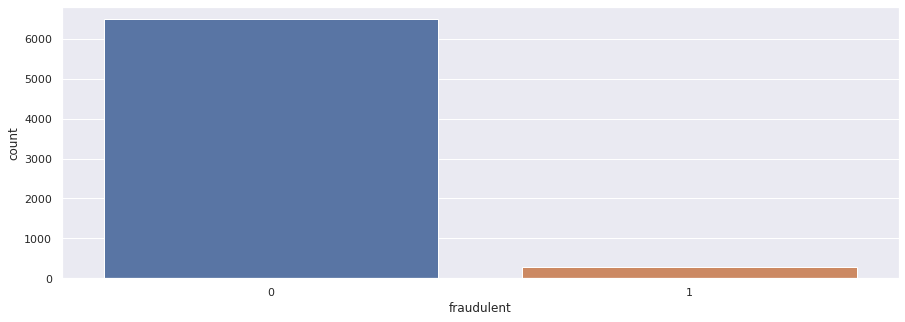

In [14]:
plt.figure(figsize=(15, 5))
sns.countplot(data=fake_job,x='fraudulent')

### Gráfico de barra refente a coluna tipo de emprego

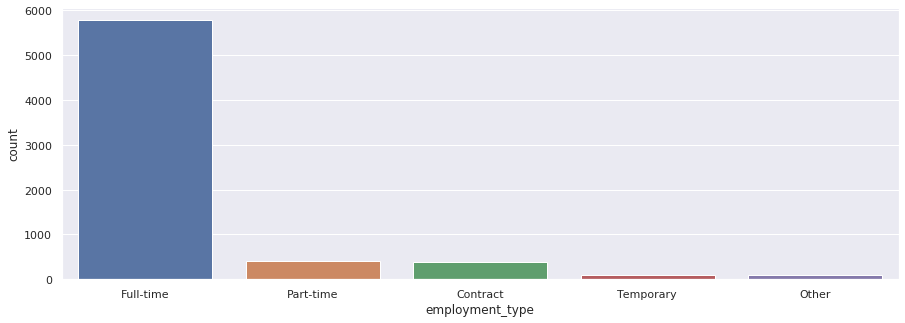

In [15]:
plt.figure(figsize=(15, 5))
sns.countplot(data=fake_job,x='employment_type')

In [16]:
# Funções axiliar para a plotagem de gráficos
def grafico_pizza(df, atributo):
    serie = df[atributo]
    value_counts = serie.value_counts()
    total = serie.count()
    frequencia = (value_counts/total) *100
    labels = serie.unique()
    colors = ['#A43820', '#FFF8C6', '#99C68E', '#4DBCD3']
    plt.figure(figsize=(15, 8))
    plt.pie(frequencia, labels=labels ,  autopct='%1.1f%%', colors=colors,
            shadow=True)
    
def grafico_barra_horizontal(df, y_value, order_value):
    plt.figure(figsize=(15, 8))
    sns.countplot(data=df,y=y_value,order=order_value)
    
    
def grafico_barra_vertical(df, atributo, length):
    serie = fake_job.filter([atributo],axis=1)
    serie['count'] = 1
    serie = serie.groupby(atributo,as_index=False, sort=False).sum()
    serie = serie.sort_values("count",ascending=False)
    serie = serie.head(length)
    plt.figure(figsize=(15,10))
    sns.barplot(data=serie,x=atributo,y='count')

### Gráfico de pizza referente ao percentual de experiência exigida

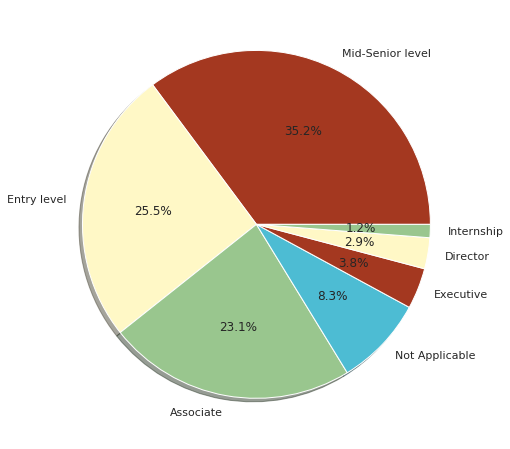

In [17]:
grafico_pizza(df=fake_job,atributo='required_experience')

### Gráfico de barras requisitos Educacionais

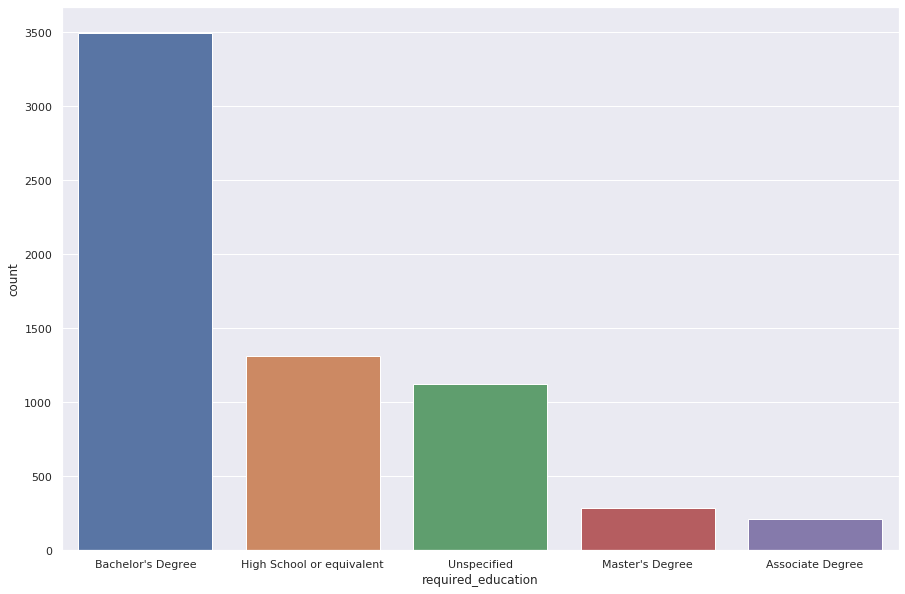

In [18]:
grafico_barra_vertical(df=fake_job,atributo='required_education', length=5)

### Gráfico de barras Tipo de Indústria

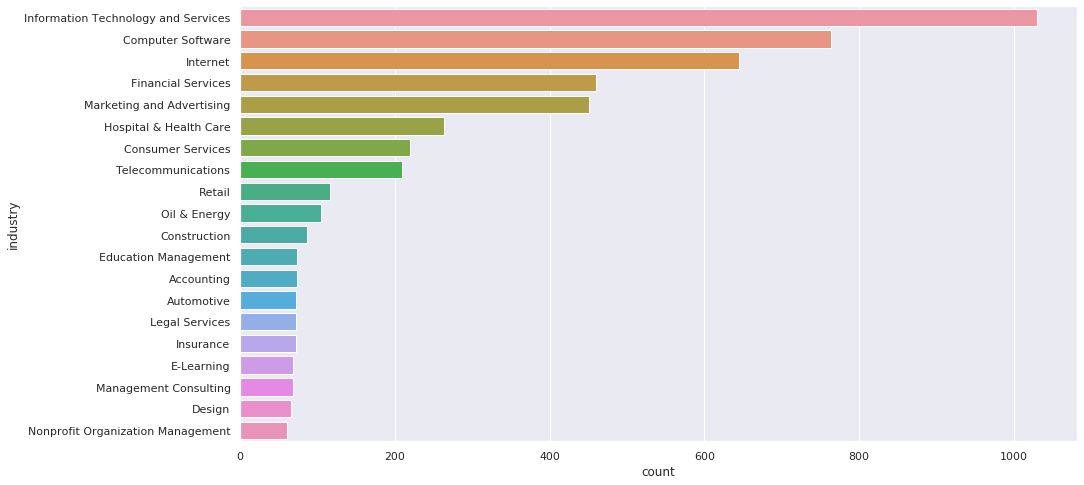

In [19]:
grafico_barra_horizontal(df=fake_job,y_value='industry',order_value=fake_job.industry.value_counts().iloc[:20].index)

### Gráfico de barras Funções

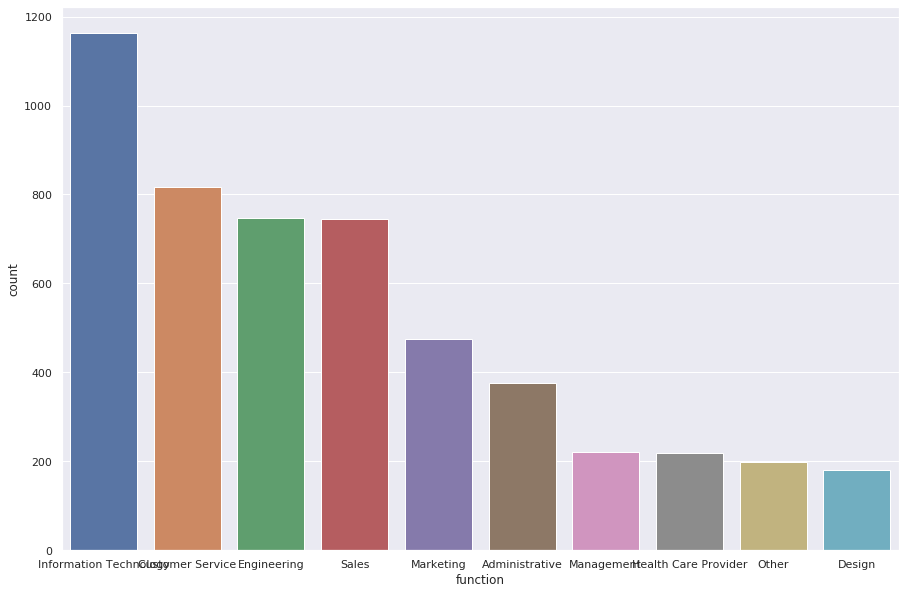

In [20]:
grafico_barra_vertical(df=fake_job, atributo='function',length=10)

### Gráfico para verificar as palavras que mais se repetem na coluna descrição (description)

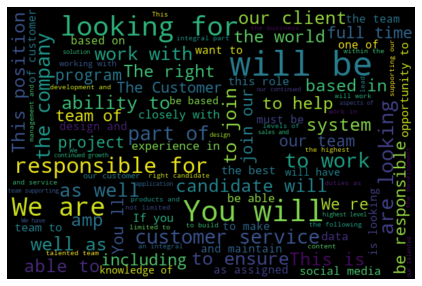

In [21]:
wordcloud = WordCloud(max_font_size=50, max_words=100,width=600, height=400,).generate(' '.join(fake_job.description))
plt.figure(figsize=(15,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## Tratamento e transformação das features

In [22]:
# Expressão regular para remover caracteres especiais
# Remover qualquer tipo de caracter que não seja letra ou numero
def remover_caracter_especial(texto):
    return re.sub('[^a-zA-Z0-9 \\\]', '', texto)

In [23]:
# Normalização e tratamento dos dados
fake_job['description'] = fake_job.apply(lambda row :normalize('NFKD', row['description']).encode('ASCII', 'ignore').decode('ASCII'),axis=1)
fake_job['description'] = fake_job['description'].apply(remover_caracter_especial)

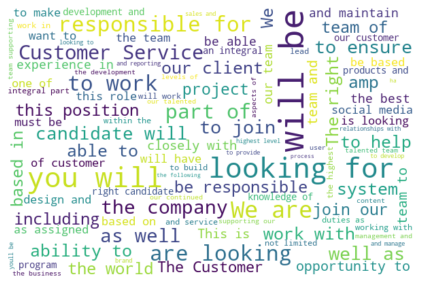

In [24]:
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords,width=600, height=400, max_font_size=50, max_words=100,background_color="white").generate(' '.join(fake_job.description))
plt.figure(figsize=(15,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## Contagem de caracteres de cada coluna

In [25]:
# Está célula cria uma nova coluna contando todos os caracteres presentes no atributo descrição. 
fake_job['size'] = fake_job.apply(lambda row: len(row.description), axis=1)
fake_job.head(5)

,description,employment_type,required_experience,required_education,industry,function,fraudulent,size
3,THE COMPANY ESRI Environmental Systems Resear...,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0,2560
4,JOB TITLE Itemization Review ManagerLOCATION F...,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0,1482
6,Your Responsibilities Manage the Englishspeaki...,Full-time,Mid-Senior level,Master's Degree,Online Media,Management,0,426
9,The Customer Service Associate will be based i...,Part-time,Entry level,High School or equivalent,Financial Services,Customer Service,0,1191
10,Position URL86fd830a95a64e2b30ceed829e63fd384...,Full-time,Mid-Senior level,Bachelor's Degree,Information Technology and Services,Information Technology,0,2756


## Tokenização

In [26]:
# Cria uma coluna e transforma cada os elementos do texto em token 
fake_job['tokens'] = fake_job.apply(lambda row: nltk.word_tokenize(row['description']), axis=1)
fake_job.head(5)

,description,employment_type,required_experience,required_education,industry,function,fraudulent,size,tokens
3,THE COMPANY ESRI Environmental Systems Resear...,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0,2560,"[THE, COMPANY, ESRI, Environmental, Systems, R..."
4,JOB TITLE Itemization Review ManagerLOCATION F...,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0,1482,"[JOB, TITLE, Itemization, Review, ManagerLOCAT..."
6,Your Responsibilities Manage the Englishspeaki...,Full-time,Mid-Senior level,Master's Degree,Online Media,Management,0,426,"[Your, Responsibilities, Manage, the, Englishs..."
9,The Customer Service Associate will be based i...,Part-time,Entry level,High School or equivalent,Financial Services,Customer Service,0,1191,"[The, Customer, Service, Associate, will, be, ..."
10,Position URL86fd830a95a64e2b30ceed829e63fd384...,Full-time,Mid-Senior level,Bachelor's Degree,Information Technology and Services,Information Technology,0,2756,"[Position, URL86fd830a95a64e2b30ceed829e63fd38..."


## Vetorização

In [27]:
vectorizer = TfidfVectorizer(sublinear_tf=True, max_df=0.5, stop_words='english')

## Extração do features

In [28]:
X = vectorizer.fit_transform(fake_job.description)
y = fake_job.fraudulent

## Matriz TF-IDF dos termos

A matriz TF-IDF tem como objetivo indicar a importância de uma palavra dentro de um conjunto de documentos.

In [29]:
todense = X.todense()
feature_names = vectorizer.get_feature_names()
tfidf = pd.DataFrame(todense, columns=feature_names).T
tfidf.head()

,0,1,2,3,4,5,6,7,8,9,...,6750,6751,6752,6753,6754,6755,6756,6757,6758,6759
000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
00005,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
01858965,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Machine Learning

## Separação dos Dataset em treinamento e teste

In [30]:
X_train, X_test, y_train,y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [31]:
def print_classification_report(value_test, pred):
    print(classification_report(value_test, pred))

In [32]:
def print_matrix_confusion(value_test, pred):
    print(confusion_matrix(value_test, pred))

In [33]:
list_acuracy_score = []

## Naive Bayes

Visando encontrar o melhor algoritmo foram testados três implementações do *naive bayes*.

In [34]:
bernoulling = BernoulliNB()
bernoulling.fit(X_train, y_train)
predict = bernoulling.predict(X_test)
print_classification_report(value_test=y_test,pred=predict)
print_matrix_confusion(value_test=y_test,pred=predict)
list_acuracy_score.append(accuracy_score(y_test, predict))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1958
           1       0.17      0.01      0.03        70

    accuracy                           0.96      2028
   macro avg       0.57      0.51      0.50      2028
weighted avg       0.94      0.96      0.95      2028

[[1953    5]
 [  69    1]]


In [35]:
complement_nb = ComplementNB()
complement_nb.fit(X_train, y_train)
predict = complement_nb.predict(X_test)
print_classification_report(value_test=y_test,pred=predict)
print_matrix_confusion(value_test=y_test,pred=predict)
list_acuracy_score.append(accuracy_score(y_test, predict))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1958
           1       0.12      0.01      0.03        70

    accuracy                           0.96      2028
   macro avg       0.55      0.51      0.50      2028
weighted avg       0.94      0.96      0.95      2028

[[1951    7]
 [  69    1]]


In [36]:
multinomial_nb = MultinomialNB()
multinomial_nb.fit(X_train, y_train)
predict = multinomial_nb.predict(X_test)
print_classification_report(value_test=y_test,pred=predict)
list_acuracy_score.append(accuracy_score(y_test, predict))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1958
           1       0.00      0.00      0.00        70

    accuracy                           0.96      2028
   macro avg       0.48      0.50      0.49      2028
weighted avg       0.93      0.96      0.95      2028



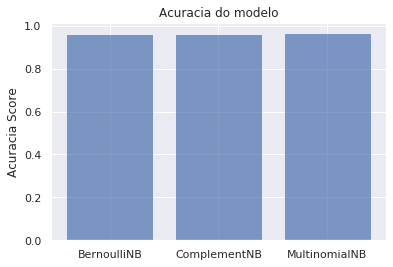

In [37]:
list_acuracy_score
naives = ['BernoulliNB','ComplementNB','MultinomialNB']
y_pos = np.arange(len(naives))
y_val = [ x for x in list_acuracy_score]
plt.bar(y_pos,y_val, align='center', alpha=0.7)
plt.xticks(y_pos, naives)
plt.ylabel('Acuracia Score')
plt.title('Acuracia do modelo')
plt.show()

Conforme vimos no gráfico as três implementações do algoritmo *bayes* apresetaram o mesmo resultado.  

**Avaliação dos resultados do modelo:**
 - Acurácia: Ambas as implementações do algoritmo *bayes* apresentaram um resultado ótimo de acurácia 0.96
 - Precisão: Ambas as implementações do algoritmo *bayes* apresentaram como correta para 0 0.97 e para 1 0.00        
 - Recall: Ambas as implementações do algoritmo *bayes* apresentaram como correta para 0: 1.00 e para 1:0.00
 - f1 score: Ambas as implementações do algoritmo *bayes* apresentaram como média harmonica: 0.98

## Support Vector Machine (SVM)

In [38]:
svm = SVC()
svm.fit(X_train, y_train)
predict = svm.predict(X_test)
print_classification_report(value_test=y_test,pred=predict)
print_matrix_confusion(value_test=y_test, pred=predict)
list_acuracy_score.append(accuracy_score(y_test, predict))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1958
           1       1.00      0.14      0.25        70

    accuracy                           0.97      2028
   macro avg       0.99      0.57      0.62      2028
weighted avg       0.97      0.97      0.96      2028

[[1958    0]
 [  60   10]]


**Avaliação dos resultados do modelo:**
 - Acurácia: O algoritmo *svm* apresentou um resultado ótimo de acurácia 0.97
 - Precisão: O algoritmo *svm* apresentou como correta para 0 0.97 e para 1 1.00        
 - Recall:   O algoritmo *svm* apresentou como correta para 0: 1.00 e para 1:0.14
 - f1 score: O algoritmo *svm* apresentou como média harmonica: 0.98 para 0.25

In [ ]:
hiperparametros = {'C': [0.1, 1, 10, 100, 1000], 
                   'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                   'kernel': ['rbf']
                  }
print(hiperparametros)

O Algoritmo de *Support Vector Machine (SVM)* apresentou uma acurácia ótima aceitável.
Abaixo temos a implementação do **GridSearchCV** para verificar se encontramos parametros melhores para o SVM.


**AVISO: VAI DEMORAR EXECUTAR ELE**. Para a melhoria de performace, foi implementado o processamento paralelo utilizando a biblioteca `dask`. 

In [ ]:
# Execute está célula para executar o grid search normal e tenha muita paciência 
grid = GridSearchCV(SVC(), hiperparametros, refit=True, verbose=3,cv=[(slice(None), slice(None))])
grid.fit(X_train, y_train)

In [ ]:
# Execute está célula para executar o grid search utilizando o processamento paralelo tenha paciência 
client = Client()
with joblib.parallel_backend('dask'):
    grid = GridSearchCV(SVC(), hiperparametros, refit=True, verbose=3)
    grid.fit(X_train, y_train)

In [ ]:
grid.best_estimator_
predict = grid.predict(X_test)
print_classification_report(value_test=y_test,pred=predict)
print_matrix_confusion(value_test=y_test,pred=predict)

In [ ]:
svm = SVC(C=1000, gamma=0.01, kernel='rbf') 
svm.fit(X_train, y_train)
predict = svm.predict(X_test)
print_classification_report(value_test=y_test,pred=predict)
print_matrix_confusion(value_test=y_test,pred=predict)

## Decision Tree

In [39]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
predict = decision_tree.predict(X_test)
print_classification_report(value_test=y_test,pred=predict)
print_matrix_confusion(value_test=y_test,pred=predict)
list_acuracy_score.append(accuracy_score(y_test, predict))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1958
           1       0.43      0.44      0.44        70

    accuracy                           0.96      2028
   macro avg       0.71      0.71      0.71      2028
weighted avg       0.96      0.96      0.96      2028

[[1917   41]
 [  39   31]]


**Avaliação dos resultados do modelo:**
 - Acurácia: O algoritmo *decision tree* apresentou um resultado ótimo de acurácia 0.96
 - Precisão: O algoritmo algoritmo *decision tree* apresentou como correta para 0 0.98 e para 1 0.45        
 - Recall:   O algoritmo *decision tree* apresentou como correta para 0: 0.98 e para 1:0.43
 - f1 score: O algoritmo *decision tree* apresentou como média harmonica: 0.98 para 0.44

## Random Forest

In [40]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train) 
predict = random_forest.predict(X_test)
print_classification_report(y_test, predict)
print_matrix_confusion(y_test, predict)
list_acuracy_score.append(accuracy_score(y_test, predict))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99      1958
           1       1.00      0.26      0.41        70

    accuracy                           0.97      2028
   macro avg       0.99      0.63      0.70      2028
weighted avg       0.98      0.97      0.97      2028

[[1958    0]
 [  52   18]]


**Avaliação dos resultados do modelo:**
 - Acurácia: O algoritmo *random forest* apresentou um resultado ótimo de acurácia 0.98
 - Precisão: O algoritmo *random forest* apresentou como correta para 0 0.98 e para 1 1.00        
 - Recall:   O algoritmo *random forest* apresentou como correta para 0: 1.00 e para 1:0.30
 - f1 score: O algoritmo *random forest* apresentou como média harmonica: 0.99 para 0.46

## Gradient boosting

In [41]:
gradient = GradientBoostingClassifier()
gradient.fit(X_train, y_train)
predict = gradient.predict(X_test)
print_classification_report(y_test, predict)
print_matrix_confusion(y_test, predict)
list_acuracy_score.append(accuracy_score(y_test, predict))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1958
           1       0.67      0.20      0.31        70

    accuracy                           0.97      2028
   macro avg       0.82      0.60      0.65      2028
weighted avg       0.96      0.97      0.96      2028

[[1951    7]
 [  56   14]]


In [42]:
xgb=XGBClassifier()
xgb.fit(X_train, y_train)
predict = xgb.predict(X_test)
print_classification_report(y_test,predict)
print_matrix_confusion(y_test, predict)
ada_boost = AdaBoostClassifier(n_estimators=100, random_state=0)
ada_boost.fit(X_train, y_train)
predict = ada_boost.predict(X_test)
print_classification_report(y_test, predict)
print_matrix_confusion(y_test, predict)
list_acuracy_score.append(accuracy_score(y_test, predict))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1958
           1       0.77      0.29      0.42        70

    accuracy                           0.97      2028
   macro avg       0.87      0.64      0.70      2028
weighted avg       0.97      0.97      0.97      2028

[[1952    6]
 [  50   20]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1958
           1       0.47      0.27      0.35        70

    accuracy                           0.96      2028
   macro avg       0.72      0.63      0.66      2028
weighted avg       0.96      0.96      0.96      2028

[[1937   21]
 [  51   19]]


**Avaliação dos resultados do modelo:**
 - Acurácia: O algoritmo *gradient boosting* apresentou um resultado ótimo de acurácia 0.97
 - Precisão: O algoritmo *gradient boosting* apresentou como correta para 0 0.98 e para 1 0.77        
 - Recall:   O algoritmo *gradient boosting* apresentou como correta para 0: 1.00 e para 1:0.29
 - f1 score: O algoritmo *gradient boosting* apresentou como média harmonica: 0.99 para 0.42

## K Nearest Neighbor (KNN)

In [43]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
predict = knn.predict(X_test)
print_classification_report(y_test, predict)
print_matrix_confusion(y_test, predict)
list_acuracy_score.append(accuracy_score(y_test, predict))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1958
           1       1.00      0.37      0.54        70

    accuracy                           0.98      2028
   macro avg       0.99      0.69      0.77      2028
weighted avg       0.98      0.98      0.97      2028

[[1958    0]
 [  44   26]]


In [44]:
error_rate = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

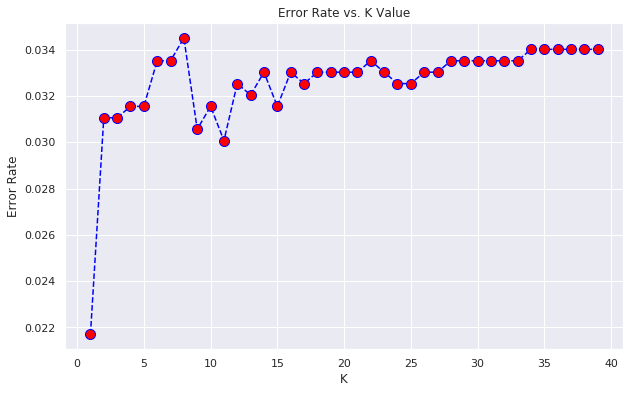

In [45]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

**Avaliação dos resultados do modelo:**
 - Acurácia: O algoritmo *knn* apresentou um resultado ótimo de acurácia 0.98
 - Precisão: O algoritmo *knn* apresentou como correta para 0 0.98 e para 1 0.45        
 - Recall:   O algoritmo *knn* apresentou como correta para 0: 0.98 e para 1:0.37
 - f1 score: O algoritmo *knn* apresentou como média harmonica: 0.98 para 0.44

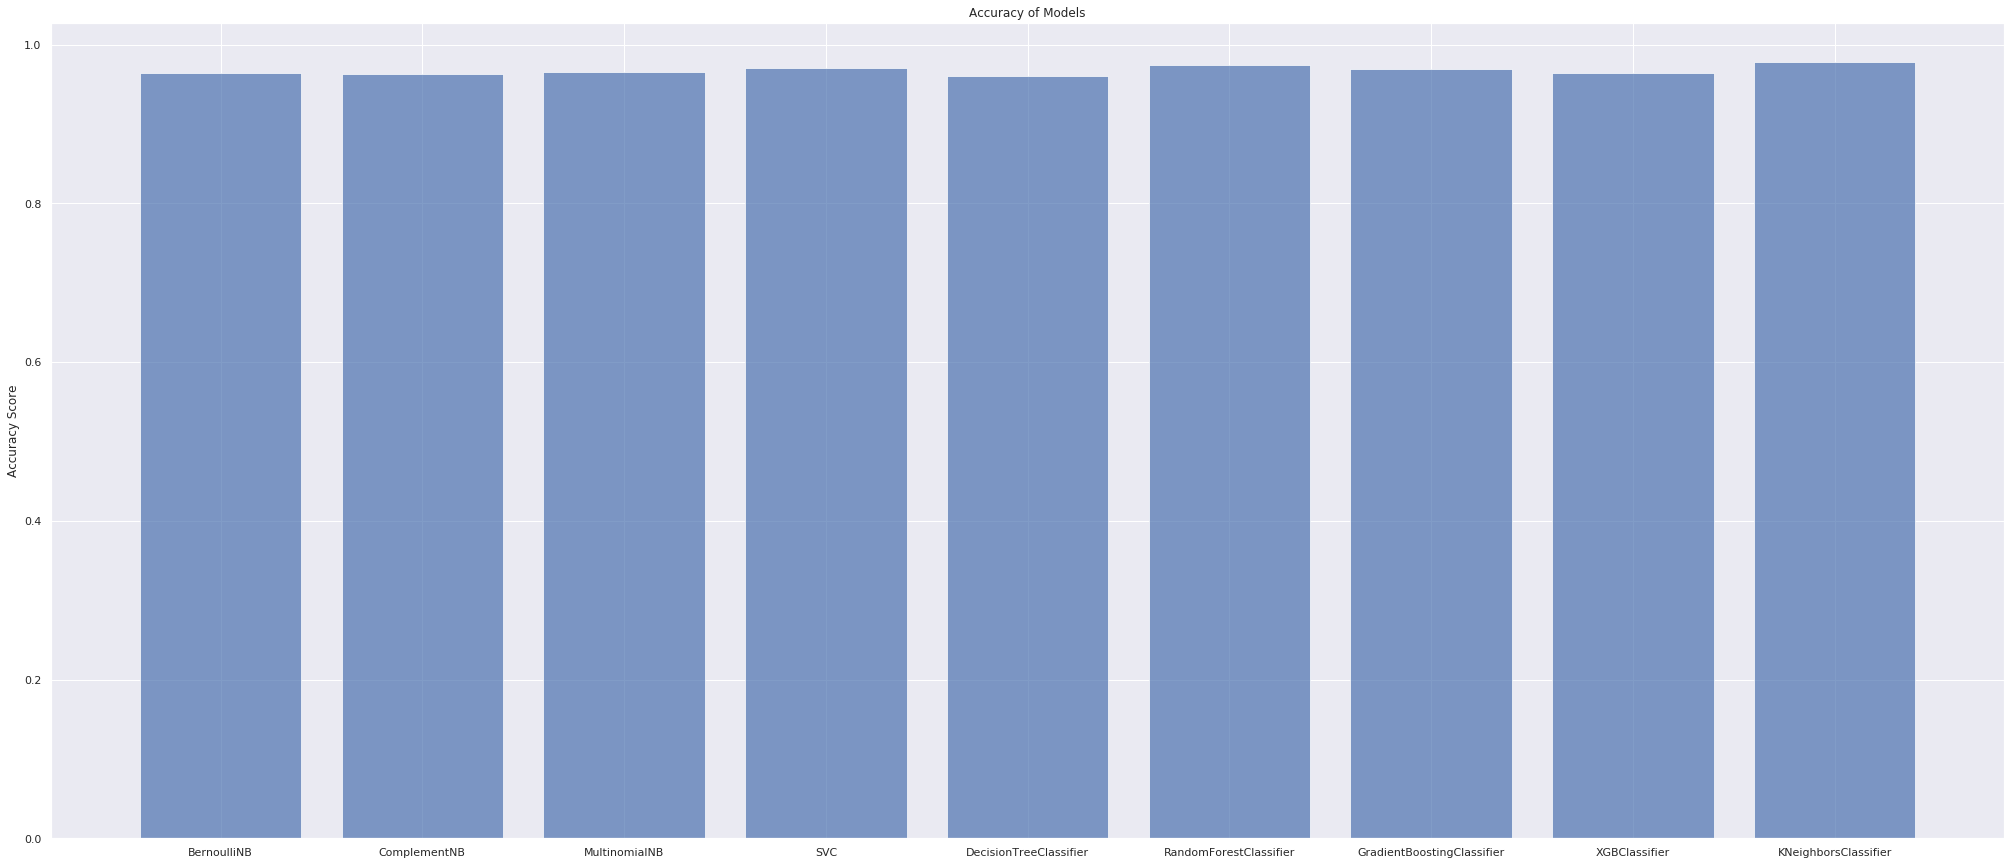

In [46]:
list_acuracy_score
modelo = ['BernoulliNB','ComplementNB','MultinomialNB','SVC',
          'DecisionTreeClassifier','RandomForestClassifier','GradientBoostingClassifier',
          'XGBClassifier','KNeighborsClassifier']
y_pos = np.arange(len(modelo))
y_val = [ x for x in list_acuracy_score]

plt.figure(figsize=(35, 15))
plt.bar(y_pos,y_val, align='center', alpha=0.7)
plt.xticks(y_pos, modelo)
plt.ylabel('Accuracy Score')
plt.title('Accuracy of Models')
plt.show()